## Test prior extend value

In [166]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2


In [167]:
EXTEND = 90
SLOPE = 10

Text(0.5, 0, 'x')

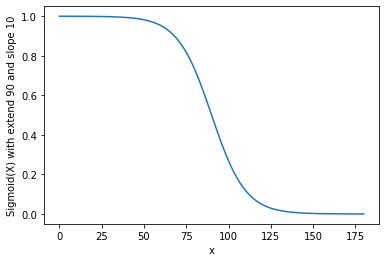

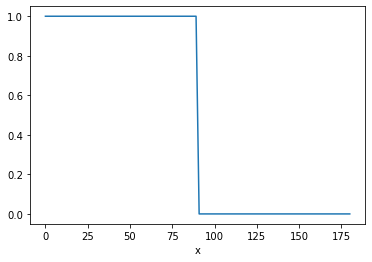

In [168]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
x = np.linspace(0, EXTEND * 2, 100)
y = sigmoid((-x + EXTEND)/ SLOPE)
y2 = (EXTEND - x) > 0 

plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel(f"Sigmoid(X) with extend {EXTEND} and slope {SLOPE}")

plt.figure()
plt.plot(x, y2)
plt.xlabel("x")

In [169]:
def vectorized_distance(A, p):
    H,W = A.shape
    px, py = p
    X,Y = np.ix_(np.arange(H),np.arange(W))
    return np.sqrt((X-px)**2 + (Y-py)**2)

In [170]:
ind = ([0,80,120], [2, 250, 250], [0, 35, 100], [3, 0, 250], [5, 10, 50],  [4, 10, 20])

In [171]:
mask = np.ones((6, 350, 350)) * -np.infty

In [172]:
for i in ind:
    p = i[1:]
    s = i[0]
    print(f'slice {s}, add point {p}')
    mask[s, :, :] = np.maximum(mask[s, :, :], vectorized_distance(mask[s, :, :], p)) 

print(mask[0,:5,:5])

#mask = ((-1) * mask + EXTEND) / SLOPE
mask = (-1) * mask + EXTEND  > 0

#mask = sigmoid(mask)

slice 0, add point [80, 120]
slice 2, add point [250, 250]
slice 0, add point [35, 100]
slice 3, add point [0, 250]
slice 5, add point [10, 50]
slice 4, add point [10, 20]
[[144.22205102 143.39107364 142.5622671  141.73566947 140.91131963]
 [143.66976021 142.8355698  142.00352108 141.17365193 140.34600101]
 [143.1223253  142.28492541 141.44963768 140.61649974 139.78555004]
 [142.57980222 141.73919712 140.90067424 140.06427096 139.2300255 ]
 [142.04224724 141.19844192 140.35668848 139.51702405 138.67948659]]


<Figure size 432x288 with 0 Axes>

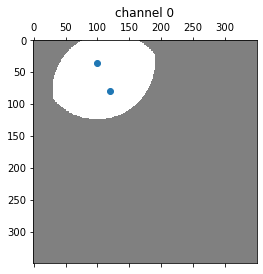

<Figure size 432x288 with 0 Axes>

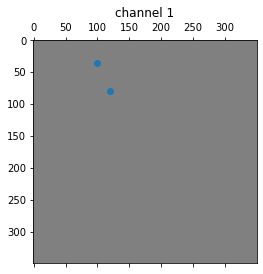

<Figure size 432x288 with 0 Axes>

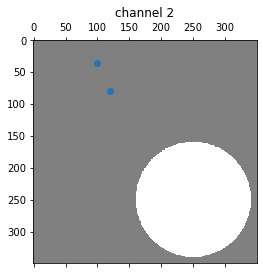

<Figure size 432x288 with 0 Axes>

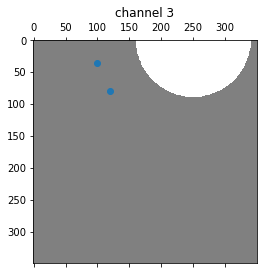

<Figure size 432x288 with 0 Axes>

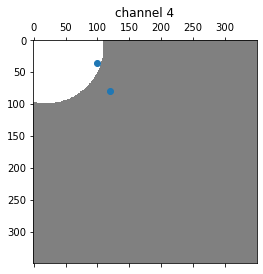

<Figure size 432x288 with 0 Axes>

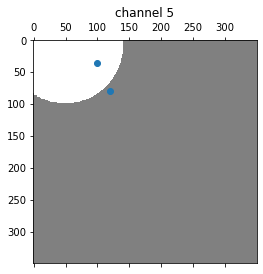

In [173]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['grey', 'w'])

for i in range(mask.shape[0]):
    plt.figure()
    plt.matshow(mask[i, :, :], interpolation='nearest', cmap=cmap)
    plt.title(f'channel {i}')
    plt.scatter(y = [80, 35], x = [120, 100])

<Figure size 432x288 with 0 Axes>

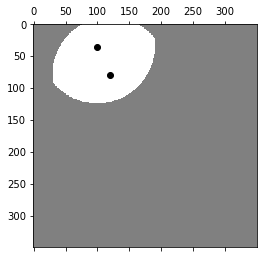

In [174]:
plt.figure()
plt.matshow(mask[0, :, :], interpolation='nearest', cmap=cmap)
plt.scatter(y = [80, 35], x = [120, 100], c='k')

plt.savefig('prior_extend.png')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<Figure size 432x288 with 0 Axes>

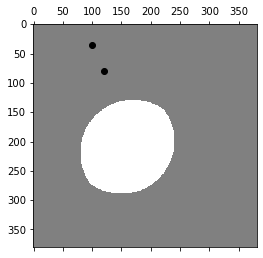

In [179]:
ind = ([200,150], [220, 170])
mask = np.ones((381, 381)) * -np.infty

for p in ind:
    mask[ :, :] = np.maximum(mask[:, :], vectorized_distance(mask[:, :], p)) 


#mask = ((-1) * mask + EXTEND) / SLOPE
mask = (-1) * mask + EXTEND  > 0
plt.figure()
plt.matshow(mask, interpolation='nearest', cmap=cmap)
plt.scatter(y = [80, 35], x = [120, 100], c='k')

mask.astype(int)

<PIL.Image.Image image mode=RGB size=381x381 at 0x7F139DC088B0>
(381, 381)


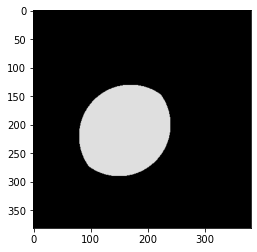

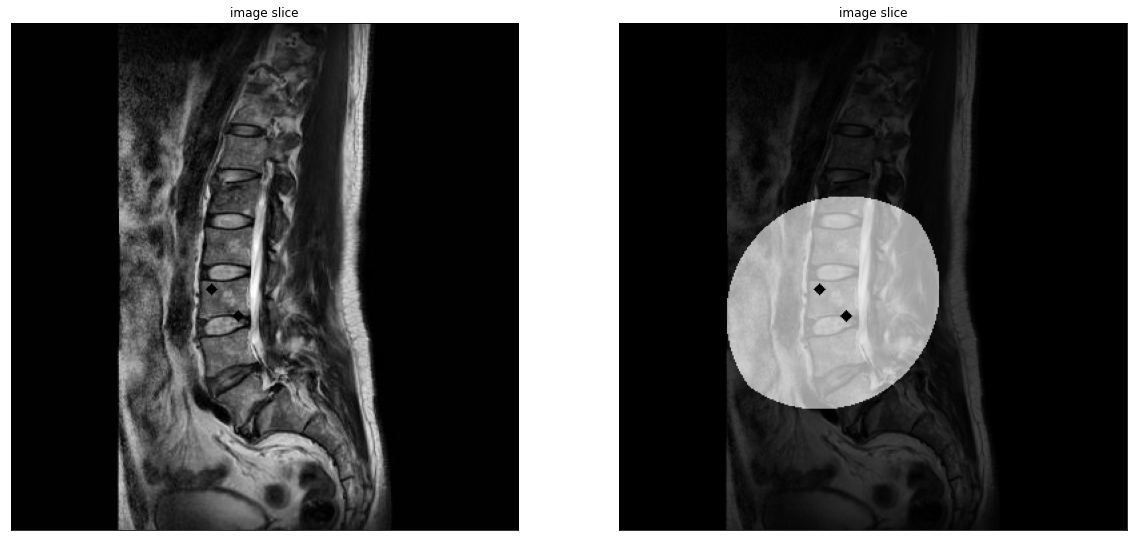

In [182]:
base_path = r'/media/jan/DataStorage/ProjectData/temp/'
result_folder_full = r'reconstruct_full'
result_folder_pseudo = r'reconstruct_pseudo'
dataset = r'dataset_2_contrast_3'
source = r'USiegen'
image_nr = 12
slice_nr = 24

image_path = os.path.join(base_path, dataset, f'{source}_images', f'image{image_nr:03d}', f'slice_{slice_nr:03d}.jpg')

im = Image.open(image_path)

mask_im = Image.fromarray(np.uint8(cm.Greys_r(mask*200)*255)).convert('RGB')
print(mask_im)
plt.imshow(mask_im)
mask_im = cv2.addWeighted(np.array(im), 0.3,np.array(mask_im), 0.7, 0)
print(im.size)
cv2.circle(mask_im, (150,200), 2, (0.3999999999999999, 0.4, 0.8), thickness=3)
cv2.circle(mask_im, (170,220), 2, (0.3999999999999999, 0.4, 0.8), thickness=3)

im = cv2.circle(np.asarray(im), (150,200), 2, (0.3999999999999999, 0.4, 0.8), thickness=3)
im = cv2.circle(im, (170,220), 2, (0.3999999999999999, 0.4, 0.8), thickness=3)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title('image slice')
plt.yticks([])
plt.xticks([])
plt.imshow(np.asarray(im))
plt.subplot(1,2,2)
plt.title('image slice')
plt.yticks([])
plt.xticks([])
plt.imshow(mask_im)
plt.grid(False)

plt.savefig('prior_extend.png',bbox_inches='tight')

<Figure size 576x576 with 0 Axes>

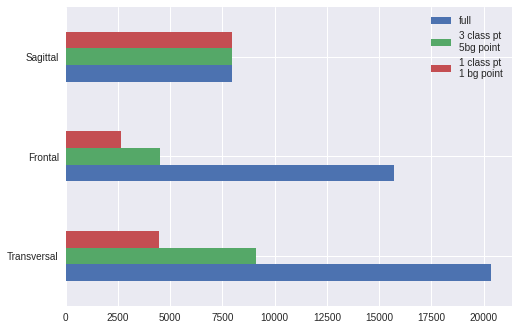

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
slice_count = {
    'Transversal' : [20356, 9121, 4466], 'Frontal': [15732, 4507, 2627], 'Sagittal' : [7939, 7939, 7939]
}
slice_count = pd.DataFrame.from_dict(slice_count, orient='index', columns= ['full', '3 class pt\n5bg point', '1 class pt\n1 bg point'])

plt.figure(figsize=(8,8))
slice_count.plot.barh()
plt.savefig('slice_count.png')

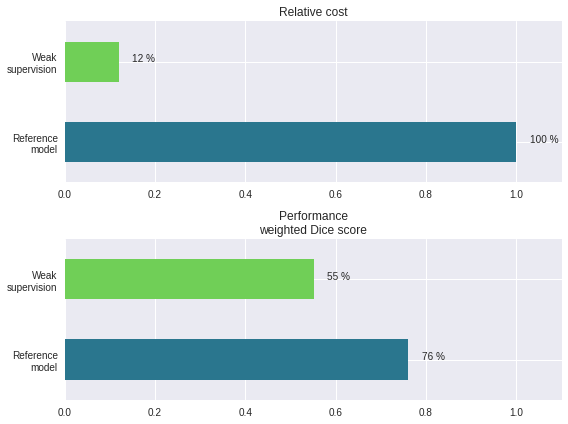

In [69]:
Result = {
    'Reference\nmodel' : [1.00, 0.76], 'Weak\nsupervision': [.12, 0.552]
}
from matplotlib import cm

colourmap = cm.viridis

Result = pd.DataFrame.from_dict(Result, orient='index', columns= ['Relative\ncost', 'Weighted\ndice score'])
plt.figure(figsize=(8,6))
ax = plt.subplot(2,1,1)
ax.set_xlim(0,1.1)
temp = Result.iloc[:,0].plot.barh(legend=False, ax = ax, color = [colourmap(100), colourmap(200)])
ax.annotate(text='12 %', xy = (0.15,1))
ax.annotate(text='100 %', xy = (1.03,0))
ax.set_title('Relative cost')
plt.tight_layout()
ax = plt.subplot(2,1,2)
Result.iloc[:,1].plot.barh(legend=False, ax = ax, color = [colourmap(100), colourmap(200)])
ax.set_xlim(0,1.1)
ax.set_title('Performance\nweighted Dice score')
ax.annotate(text='55 %', xy = (0.58,1))
ax.annotate(text='76 %', xy = (0.79,0))
plt.tight_layout()
plt.savefig('ResultsPlot.png')

In [37]:
colourmap(0.12*255)

(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)